In [2133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ==========================
# 1. Chargement du dataset
# ==========================

In [2134]:
# Charger le dataset
dataset = pd.read_csv("CarPrice_Assignment.csv")
dataset.head()


,car_ID,price,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling
0,1,13495.0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,3
1,2,16500.0,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,3
2,3,16500.0,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,1
3,4,13950.0,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,2
4,5,17450.0,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,2


In [2135]:
# Méthode recommandée (sans warning)
dataset['fueltype'] = dataset['fueltype'].map({'gas': 0, 'diesel': 1}).astype('int8')

# Alternative équivalente
# dataset['fueltype'] = np.where(dataset['fueltype'] == 'gas', 0, 1).astype('int8')

# Extraction des features
features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
            'enginesize', 'boreratio', 'stroke', 'compressionratio',
            'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'symboling',
            'fueltype']
X = dataset[features].values
y = dataset['price'].values.reshape(-1, 1)

# Vérification
print("Valeurs uniques de fueltype:", dataset['fueltype'].unique())
print("Type de données:", dataset['fueltype'].dtype)
print("Shape de X:", X.shape)
print("5 premières lignes:\n", X[:5])

Valeurs uniques de fueltype: [0 1]
Type de données: int8
Shape de X: (164, 15)
5 premières lignes:
 [[8.860e+01 1.688e+02 6.410e+01 4.880e+01 2.548e+03 1.300e+02 3.470e+00
  2.680e+00 9.000e+00 1.110e+02 5.000e+03 2.100e+01 2.700e+01 3.000e+00
  0.000e+00]
 [8.860e+01 1.688e+02 6.410e+01 4.880e+01 2.548e+03 1.300e+02 3.470e+00
  2.680e+00 9.000e+00 1.110e+02 5.000e+03 2.100e+01 2.700e+01 3.000e+00
  0.000e+00]
 [9.450e+01 1.712e+02 6.550e+01 5.240e+01 2.823e+03 1.520e+02 2.680e+00
  3.470e+00 9.000e+00 1.540e+02 5.000e+03 1.900e+01 2.600e+01 1.000e+00
  0.000e+00]
 [9.980e+01 1.766e+02 6.620e+01 5.430e+01 2.337e+03 1.090e+02 3.190e+00
  3.400e+00 1.000e+01 1.020e+02 5.500e+03 2.400e+01 3.000e+01 2.000e+00
  0.000e+00]
 [9.940e+01 1.766e+02 6.640e+01 5.430e+01 2.824e+03 1.360e+02 3.190e+00
  3.400e+00 8.000e+00 1.150e+02 5.500e+03 1.800e+01 2.200e+01 2.000e+00
  0.000e+00]]


In [2136]:
def z_score_normalization(data):
    """
    Normalise les caractéristiques d'un ensemble de données en utilisant la méthode Z-score.

    Args:
    - data : un tableau NumPy contenant les données à normaliser. Chaque colonne représente une caractéristique.

    Returns:
    - data_normalized : le tableau NumPy contenant les données normalisées.
    - mean : le tableau NumPy contenant les moyennes de chaque caractéristique avant normalisation.
    - std : le tableau NumPy contenant les déviations standard de chaque caractéristique avant normalisation.
    """
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [2137]:
# Séparer les données en ensemble d'entraînement et de test

X_fuel = X[:, -1].reshape(-1, 1)  # Récupère uniquement 'fueltype' et le transforme en colonne
X_other = X[:, :-1]  # Toutes les colonnes sauf 'fueltype'


x_train_fuel, x_test_fuel, y_train, y_test = train_test_split(X_fuel, y, test_size=0.2, random_state=13)

x_train, x_test, y_train, y_test =  train_test_split(X_other, y, test_size=0.2, random_state=13)
print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)
#X_other
#X_fuel

x_train shape  :  (131, 14)
x_test shape  :  (33, 14)
y_train shape  :  (131, 1)
y_test shape  :  (33, 1)


In [2138]:
# Normalization de x_train
x_train_norm, mean,std=z_score_normalization(x_train)
x_train_norm


array([[ 0.13452474,  0.40720408,  0.41253381, ...,  1.76080064,
         1.72295435, -0.82939897],
       [ 0.91664828,  1.31133519,  0.60215462, ..., -0.7670337 ,
        -0.82825531,  0.04682091],
       [ 1.14962125,  0.18117131,  0.22291301, ...,  0.97085241,
         1.27274088, -0.82939897],
       ...,
       [ 0.91664828,  1.69881994,  1.07620663, ..., -1.39899229,
        -1.27846878, -0.82939897],
       [ 2.33112702,  2.1347403 ,  3.01981988, ..., -1.71497158,
        -2.17889572,  0.04682091],
       [-0.34806212,  0.03586452,  0.31772341, ..., -0.92502335,
        -0.97832647,  1.79926066]], shape=(131, 14))

In [2139]:
x_train_norm.mean()

np.float64(-1.232020665058407e-15)

In [2140]:
x_train_norm.std()

np.float64(0.9999999999999999)

In [2141]:
# Normalization de x_test
x_test_norm= (x_test - mean)/std
x_test_norm

array([[-0.7141625 , -1.24767874, -0.58297541, -1.05404763, -0.98095208,
        -0.76303898, -1.29983446, -0.02809009, -0.05530869, -0.90276267,
         0.78995984,  0.97085241,  1.12266972,  0.92304079],
       [-0.28149842,  0.01971933, -0.1089234 , -1.59782354, -0.30226913,
        -0.37476839, -0.55430769,  0.64096479, -0.65619615,  0.30194269,
         0.78995984, -0.29306476, -0.07789953,  1.79926066],
       [ 1.44915792,  1.1902462 ,  2.21393146,  0.53843896,  1.78384649,
         1.19988456,  0.97402219,  1.16457295,  3.77139569,  0.47762889,
        -1.72871634, -0.45105441, -0.82825531, -0.82939897],
       [ 1.29938959,  1.61002135,  2.73538867,  0.84916805,  0.78065667,
         0.18606691, -0.47975501,  0.46642873, -0.33993959,  0.15135452,
         0.78995984, -0.92502335, -0.82825531,  0.04682091],
       [-0.44790768, -0.30318464,  0.0332922 , -1.52014127, -0.28372588,
        -1.23759193,  0.04211373,  0.04463327, -0.05530869, -0.07452773,
         1.88503644, -1.24

In [2142]:
# Concaténation horizontale
x_test_combined = np.hstack((x_test_norm, x_test_fuel))

# Vérification
print("Shape de x_test_combined:", x_test_combined.shape)  

Shape de x_test_combined: (33, 15)


In [2143]:
x_train_combined = np.hstack((x_train_norm, x_train_fuel))

# Vérification
print("Shape de x_train_combined:", x_train_combined.shape)

Shape de x_train_combined: (131, 15)


In [2144]:
X_test_norm_1 = np.hstack((x_test_combined, np.ones((x_test_combined.shape[0], 1))))
X_test_norm_1

array([[-0.7141625 , -1.24767874, -0.58297541, -1.05404763, -0.98095208,
        -0.76303898, -1.29983446, -0.02809009, -0.05530869, -0.90276267,
         0.78995984,  0.97085241,  1.12266972,  0.92304079,  0.        ,
         1.        ],
       [-0.28149842,  0.01971933, -0.1089234 , -1.59782354, -0.30226913,
        -0.37476839, -0.55430769,  0.64096479, -0.65619615,  0.30194269,
         0.78995984, -0.29306476, -0.07789953,  1.79926066,  0.        ,
         1.        ],
       [ 1.44915792,  1.1902462 ,  2.21393146,  0.53843896,  1.78384649,
         1.19988456,  0.97402219,  1.16457295,  3.77139569,  0.47762889,
        -1.72871634, -0.45105441, -0.82825531, -0.82939897,  1.        ,
         1.        ],
       [ 1.29938959,  1.61002135,  2.73538867,  0.84916805,  0.78065667,
         0.18606691, -0.47975501,  0.46642873, -0.33993959,  0.15135452,
         0.78995984, -0.92502335, -0.82825531,  0.04682091,  0.        ,
         1.        ],
       [-0.44790768, -0.30318464,  0

In [2145]:
x_train_norm_1 = np.hstack((x_train_combined, np.ones((x_train_combined.shape[0], 1))))
x_train_norm_1

array([[ 0.13452474,  0.40720408,  0.41253381, ..., -0.82939897,
         1.        ,  1.        ],
       [ 0.91664828,  1.31133519,  0.60215462, ...,  0.04682091,
         0.        ,  1.        ],
       [ 1.14962125,  0.18117131,  0.22291301, ..., -0.82939897,
         1.        ,  1.        ],
       ...,
       [ 0.91664828,  1.69881994,  1.07620663, ..., -0.82939897,
         0.        ,  1.        ],
       [ 2.33112702,  2.1347403 ,  3.01981988, ...,  0.04682091,
         0.        ,  1.        ],
       [-0.34806212,  0.03586452,  0.31772341, ...,  1.79926066,
         0.        ,  1.        ]], shape=(131, 16))

# =============================================
# 2. Régression multiple avec descente de gradient
# =============================================

In [2146]:

# Initialiser le vecteur theta aléatoirement
theta = np.random.randn(x_train_combined.shape[1], 1)
theta

array([[-0.91767308],
       [ 0.2299585 ],
       [ 0.12107807],
       [ 0.12726797],
       [ 0.63128391],
       [ 0.84291803],
       [-0.8031921 ],
       [ 0.51090322],
       [-0.90820623],
       [ 0.46905998],
       [ 0.25030225],
       [-0.23253502],
       [-1.48003713],
       [ 0.16208842],
       [-2.12633342]])

In [2147]:
def model(X, theta):
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [2148]:
cost_function(x_train_combined, y_train, theta)

np.float64(126447856.21841086)

In [2149]:
# Paramètres de la descente de gradient
n_iterations = 100000
learning_rate = 0.01

#entrainement:
theta_final, cost_history = gradient_descent(x_train_combined, y_train, theta, learning_rate, n_iterations)

theta_final


array([[ -1115.80420945],
       [  3596.12287462],
       [ -1320.00863003],
       [   529.9108047 ],
       [ -2496.49251441],
       [ 14682.12272551],
       [ -1700.84967677],
       [ -5270.73792742],
       [-34902.6323918 ],
       [ -2916.95783803],
       [  5571.70558871],
       [ -6097.79468358],
       [  8134.78284223],
       [  1254.0180648 ],
       [163317.51280305]])

In [2150]:
cost_history

array([1.22925886e+08, 1.19854064e+08, 1.17173808e+08, ...,
       2.64613871e+07, 2.64613866e+07, 2.64613861e+07], shape=(100000,))

In [2151]:
# Prédictions et évaluation pour la méthode manuelle
def coef_determination(y, pred):
    u = ((y - pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - u / v

predictions = model(x_test_combined, theta_final)
r2 = coef_determination(y_test, predictions)
print(f'R² Score (Descente de gradient): {r2}')

R² Score (Descente de gradient): -0.17275823349961872


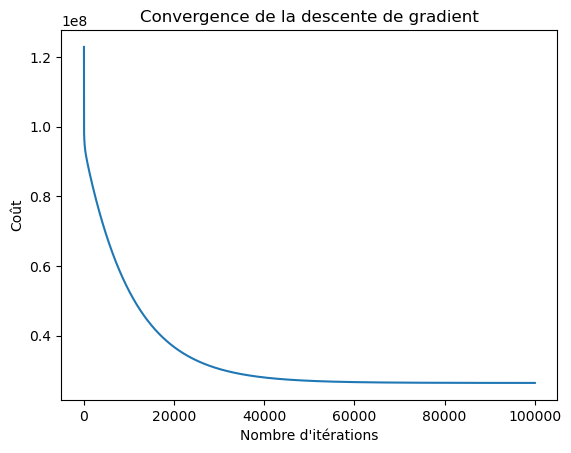

In [2152]:
# Visualisation de la convergence de la fonction coût
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.show()
